# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [45]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [46]:
from random import shuffle
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 649 to 732
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1887 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1903 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1894 non-null   object 
 7   website url          1747 non-null   object 
 8   menu url             737 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1096 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null   

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [47]:
print(df_train.info())
df_train.head(2)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 649 to 732
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1887 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1903 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1894 non-null   object 
 7   website url          1747 non-null   object 
 8   menu url             737 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1096 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null   

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
649,#25,'T Houten Hand,3.5 of 5 bubbles,99 reviews,$$ - $$$|Belgian|Seafood|European,"Ninovesteenweg 80, Aalst 9320 Belgium",+32 53 70 60 63,http://sites.resto.com/thoutenhand/,NaN,False,NaN,False,False,4.0,4.0,3.5,4.0,NaN,NaN,No pricing available,"Belgian, Seafood, European",Vegetarian Friendly,"Lunch, Dinner","Reservations, Seating, Wheelchair Accessible, ...",3155490
1798,#596,Cheesebar,5.0 of 5 bubbles,2 reviews,French|Belgian|European|Contemporary,"Schouwburgstraat 7, Ghent 9000 Belgium",NaN,http://www.cafetheatre.com/,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"French, Belgian, European, Contemporary, Diner...",NaN,NaN,NaN,15605130


we will start by turning rank, general rating, number of reviews to numerical values

In [48]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [49]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [50]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

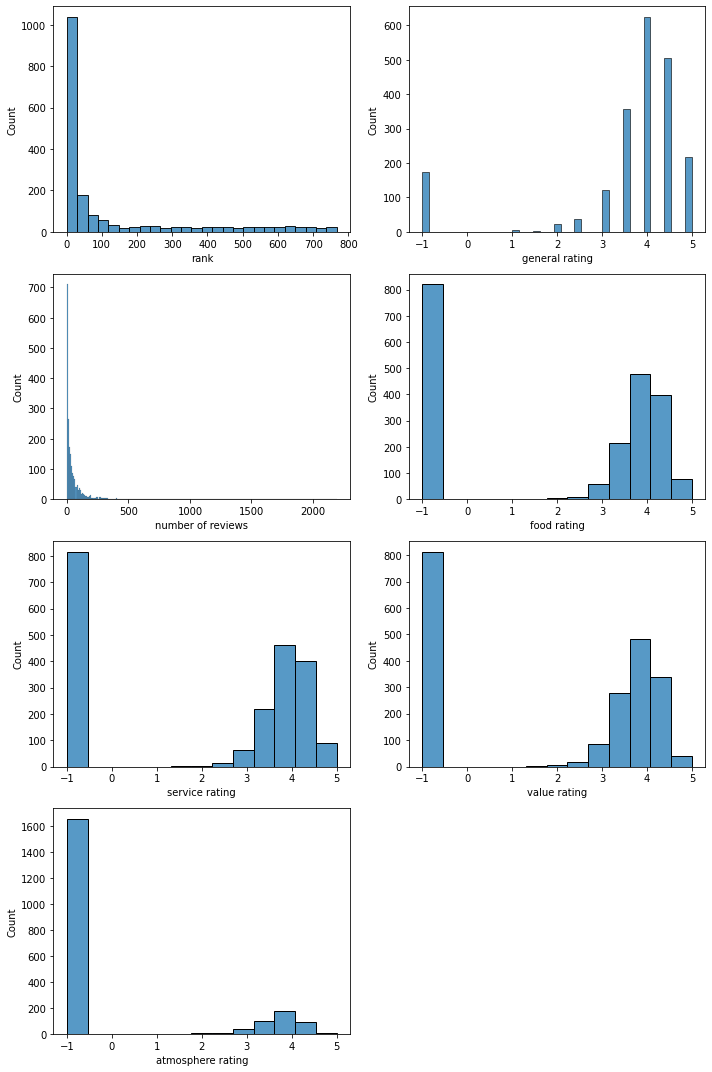

In [51]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible


let's take a closer look at number of reviews

### number of reviews

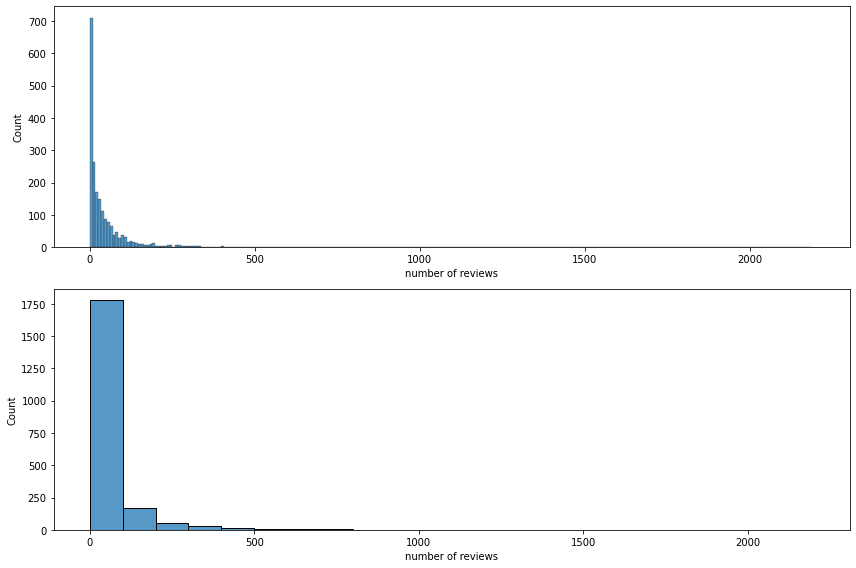

In [52]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [53]:
print(df_train["number of reviews"].value_counts())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0      174
1.0      114
2.0       99
3.0       73
4.0       64
        ... 
740.0      1
303.0      1
269.0      1
159.0      1
195.0      1
Name: number of reviews, Length: 277, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. how many exactly?

In [54]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


8.43% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [55]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 22.29%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because of a bad rating or maybe bcause of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [56]:
df_train['city'] = df_train['address'].str.split(" Belgium").str[0]
df_train['city'] = df_train['city'].str.split(",").str[-1]
df_train['city'] = df_train['city'].str.split(" ").str[1]

we can also use some external libraries to extract latitute and longitude from the full address (so its easier to plot)

In [57]:
df_train["address"]

649                 Ninovesteenweg 80, Aalst 9320 Belgium
1798               Schouwburgstraat 7, Ghent 9000 Belgium
70            Abdijstraat 10, Geraardsbergen 9500 Belgium
2017               Korte Zoutstraat 6, Aalst 9300 Belgium
1487    Burgemeester Omer De Meyplein 16 Beoordelingen...
                              ...                        
1987                        Velle 141, Temse 9140 Belgium
957                     Marktplein 10, Hamme 9220 Belgium
432     Gebroeders Vandeveldestraat 2-4, Ghent 9000 Be...
884                         Markt 16, Deinze 9800 Belgium
732             Grote steenweg 127, De Pinte 9840 Belgium
Name: address, Length: 2064, dtype: object

In the next code block we try to find a correlation between the popularity of a restaurant and the type of restaurant. For example are Chinese restaurants the most popular? We find this out by using the average rank as popularity measure and the tags as restaurant type.

In [58]:
df_train_tags_cleaned = df_train.copy()

# splitting all the tags
df_train_tags_cleaned["tags"] = df_train_tags_cleaned["tags"].str.split("|")

# converting every tag into a new column
df_train_tags_cleaned = df_train_tags_cleaned.explode('tags').reset_index(drop=True)

# drop all tags with $ in
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").filter(lambda x : str(x).count("$") == 0)

# make a copy for in a later stage
df_train_tags_cleaned_copy = df_train_tags_cleaned.copy()

# keep the rank and tags column
df_train_tags_cleaned = df_train_tags_cleaned[["rank", "tags"]]



# group by tag and take the mean of all the ranks
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").mean()
df_train_tags_cleaned = df_train_tags_cleaned.dropna()
df_train_tags_cleaned = df_train_tags_cleaned.sort_values(by=["rank"]) # sorting
df_train_tags_cleaned


,rank
tags,
Cajun & Creole,3.0
Japanese sweets parlour,6.0
Central European,6.8
Egyptian,7.5
Beer restaurants,9.0
...,...
Pakistani,456.0
Halal,527.0
Korean,561.5


From the column above we can see that the tag Cajun & Creole is the most popular. It might be interesting to start a restaurant with one of the top ranked types to be popular.

If you know what type restaurant you want to open, a very important decision is to choose where to open your restaurant.
We want to know the following questions:

* Which city is has the highest average ranked restaurants?
* How many type restaurants are there in every city? (for example how many Chinese restaurants in Gent, Antwerpen, ...)

The answer on the following questions can give us insight on the location of the restaurant.

In the following codeblock we answer the first question, even though it's not sorted on the average rank. The reason why is because you would see as first the cities with one restaurant and a low (good) ranking. This doesn't tell us much, this is why we sort first on the amount of restaurants.

In [59]:
df_train_city = df_train[["city", "rank"]]

count = df_train_city.groupby("city").count()

df_train_city = df_train_city.dropna()
df_train_city = df_train_city.groupby("city").mean()
df_train_city["amount of restaurants"] = count
df_train_city = df_train_city.sort_values(by=["amount of restaurants", "rank"], ascending=[False, True])


df_train_city


,rank,amount of restaurants
city,,
Ghent,381.099839,621
Aalst,64.597938,97
Sint-Niklaas,55.825581,86
Dendermonde,31.480769,52
Oudenaarde,26.681818,44
...,...,...
Oordegem,2.000000,1
Rupelmonde,2.000000,1
Sint-Jan-in-Eremo,2.000000,1


In [60]:
df_train_city_type = df_train_tags_cleaned_copy[["city", "tags"]]
df_train_city_type = df_train_city_type.groupby(["tags", "city"])["city"].count().to_frame()
df_train_city_type = df_train_city_type.rename(columns={"city": "city_count"})


df_train_city_type

# Find how many Chinese restaurants there are. The cities that are missing means that there aren't any there
# df_train_city_type.loc["Chinese"]


city_count
tags       city                           
Afghan     Aalst                         1
           Geraardsbergen                1
African    Eeklo                         1
           Ghent                         3
           Temse                         1
...                                    ...
Vietnamese Sint-Denijs-Westrem           1
           Steendorp                     1
Wine Bar   Ghent                         7
           Oudenaarde                    1
           Temse                         1

[1185 rows x 1 columns]

In [61]:
coords = pd.read_csv("coordinaten2.csv")

df_train_coords = df_train.merge(coords,on="id")

In [62]:
# df_train_coords = df_train_coords.replace(-1, np.nan)

print(df_train_coords["atmosphere rating"].mean())
print(df_train_coords["atmosphere rating"].median())

df_train_coords_low = df_train_coords[df_train_coords["atmosphere rating"] < 4.5]
df_train_coords_high = df_train_coords[df_train_coords["atmosphere rating"] >= 4.5]


-0.03343023255813953
-1.0


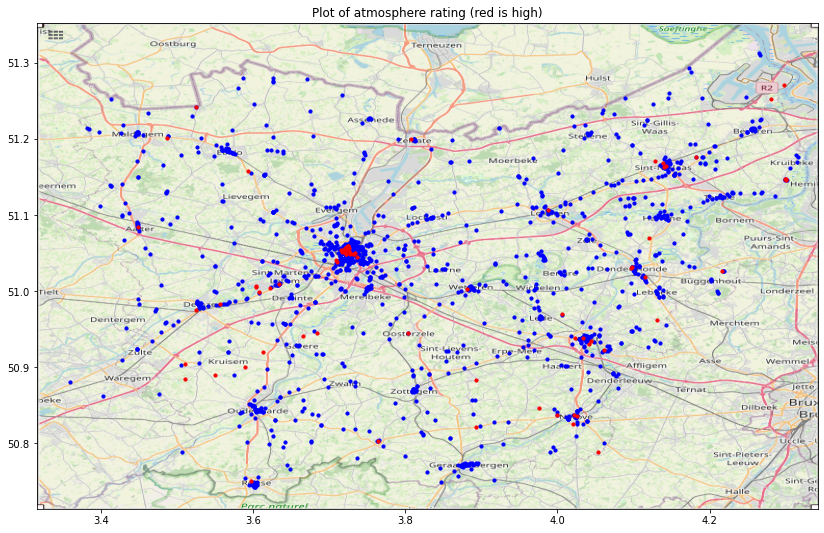

In [63]:
Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_train_coords_low.longitude, df_train_coords_low.latitude, zorder=1, alpha= 1, c='b',s=10)
ax.scatter(df_train_coords_high.longitude, df_train_coords_high.latitude, zorder=1, alpha= 1, c='r',s=10)

ax.set_title('Plot of atmosphere rating (red is high)')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

When you start a new restaurant, you certainly don't want to offer less features than other restaurants. It can be handy to know which restaurant features there are available, but also which ones are not frequently offered. That's maybe where you can offer more.

In [64]:
df_train_copy = df_train.copy()
df_train_copy["restaurant features"] = df_train_copy["restaurant features"].str.split(",")
df_train_copy = df_train_copy.filter(["restaurant features", "rank"])

df_train_features_exploded = df_train_copy.explode('restaurant features').reset_index(drop=True)
df_train_features_exploded["restaurant features"] = df_train_features_exploded["restaurant features"].str.strip()
df_train_features_exploded = df_train_features_exploded.dropna()

df_train_features_exploded.groupby("restaurant features").count()
df_train_features_exploded = df_train_features_exploded.rename(columns={"rank": "occurences"})
df_train_features_exploded = df_train_features_exploded.sort_values(by=["occurences"], ascending=False)

df_train_features_exploded

,restaurant features,occurences
8124,Takeout,767.0
5037,Seating,765.0
5038,Serves Alcohol,765.0
5039,Table Service,765.0
5036,Reservations,765.0
...,...,...
5269,Free off-street parking,1.0
5268,Validated Parking,1.0
5267,Parking Available,1.0
5266,Seating,1.0


In [68]:
def language_detector(text):
    """
    true means it's western language (English, Dutch, ...)
    false means it's an exotic language (Chinese, Arabic, ...)
    """
    text = str(text)
    west_count = 0
    exotic_count = 0
    for kar in text:
        ascii = ord(kar)
        if ascii > 256:
            exotic_count += 1
        else:
            west_count += 1
    
    return west_count > exotic_count

df_reviews = pd.read_csv("tripadvisor_dataset/reviews.csv")
df_reviews_train, df_reviews_test = train_test_split(df_reviews, test_size=0.2)

df_reviews_train["review"] = df_reviews_train["review"].apply(lambda x: language_detector(x))


59709     True
125691    True
132916    True
55354     True
66592     True
          ... 
64060     True
74977     True
34355     True
8557      True
129969    True
Name: review, Length: 108938, dtype: bool

In [69]:
df_reviews_train_false = df_reviews_train[df_reviews_train.review == False]
df_reviews_train_false



,id,reviewer name,title,date,rating,review
88940,3228265,sino23,名物料理,"May 9, 2019",4.0,False
13868,6878996,Barsj,Люблю мясо,"December 15, 2015",5.0,False
114513,8674461,Explore809309,入りにくい●●● 第２回目,"December 29, 2015",5.0,False
76128,1924338,SonyaDol,Вкусные вафли,"November 4, 2014",5.0,False
5525,6943054,Oksanaserg,Восторг!,"June 22, 2015",5.0,False
...,...,...,...,...,...,...
76152,1924338,dreamer-ru,любите свежие горячие вафли на завтрак-вам сюда!,"May 26, 2014",5.0,False
100954,740664,Nittama,Счастье есть,"October 25, 2017",5.0,False
10748,814598,Alexey_12154,Французская кухня в центре Гента,"September 13, 2018",5.0,False
16013,8423272,Companion745515,Highly recommend,"July 14, 2018",5.0,False


In [70]:
df_reviews_train_false = df_reviews_train_false.groupby("id").count()
df_reviews_train_false = df_reviews_train_false.filter(["id", "date"])
df_reviews_train_false = df_reviews_train_false.rename(columns={"date": "occurences"})
df_reviews_train_false = df_reviews_train_false.sort_values(by=["occurences"], ascending=False)

df_reviews_train_false

,occurences
id,
814598,43
740683,42
796954,31
1058490,30
1495275,27
...,...
3943658,1
3954887,1
740622,1


In [67]:
df_reviews_train_false.merge(df_train, on="id")

,id,occurences,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,city
0,814598,41,16.0,Du Progres,4.5,2193.0,$$ - $$$|Belgian|European|Vegetarian Friendly,"Korenmarkt 10, Ghent 9000 Belgium",+32 9 225 17 16,http://www.duprogres.be/,NaN,True,info@duprogres.be,True,False,4.5,4.5,4.5,4.0,Restaurant Du Progres is a real family restaur...,Restaurant Du Progres is een écht familieresta...,€22 - €29,"Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch, Late Night","Reservations, Outdoor Seating, Seating, Highch...",Ghent
1,740683,37,84.0,Amadeus Ghent 1,4.0,1906.0,$$ - $$$|Belgian|Barbecue|European,"Plotersgracht 8-10, Ghent 9000 Belgium",+32 497 43 85 71,http://amadeus-resto.be/en/amadeus-gent-1-pate...,http://amadeus-resto.be/en/afhaalmenu/,True,webmaster@amadeus-resto.be,False,False,4.0,4.0,4.0,4.0,Amadeus and Kaffee Amadeus are 2 of the Amadeu...,"Amadeus Gent 1 en Kaffee Amadeus , beide in he...",€12 - €20,"Belgian, Barbecue, European",NaN,"Lunch, Dinner, Late Night","Reservations, Seating, Highchairs Available, S...",Ghent
2,1058490,32,58.0,Restaurant De Graslei,4.0,1484.0,$$ - $$$|Belgian|Dutch|Seafood,"Graslei 7, Ghent 9000 Belgium",+32 9 225 51 47,http://www.restaurantdegraslei.be/,http://www.restaurantdegraslei.be/nl/menus,True,info@restaurantdegraslei.be,False,False,4.0,4.0,4.0,4.5,"Restaurant De Graslei, located near one of the...",Restaurant De Graslei gelegen op het mooiste p...,€18 - €30,"Belgian, Dutch, Seafood, European, Central Eur...","Vegetarian Friendly, Gluten Free Options","Lunch, Dinner, Brunch","Reservations, Outdoor Seating, Seating, Highch...",Ghent
3,1913510,31,69.0,Bridge,4.0,739.0,$$ - $$$|Belgian|Bar|European,"Sint-Baafsplein 21, Ghent 9000 Belgium",+32 9 223 61 67,http://www.brasseriebridge.be/,https://www.brasseriebridge.be/menukaart/,True,info@brasseriebridge.be,False,False,4.0,4.0,4.0,4.0,NaN,NaN,€13 - €33,"Belgian, Bar, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Reservations, Outdoor Seating, Seating, Highch...",Ghent
4,6578428,22,18.0,Seli's Noodlebar,4.5,793.0,$$ - $$$|Healthy|Street Food|Hong Kong,"Limburgstraat 28 Oost Vlaanderen, Ghent 9000 B...",+32 9 223 58 88,http://www.selinoodlebar.be/,http://www.selinoodlebar.be/,True,seli.noodlebar@gmail.com,True,False,4.5,4.5,4.5,4.0,Small local familyrestaurant with open kitchen...,Klein familiale restaurant. Gelegen naast de S...,€4 - €15,"Healthy, Street Food","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Drinks","Delivery, Outdoor Seating, Full Bar, Takeout, ...",Ghent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3411434,1,221.0,San Marco Ristorante,4.0,143.0,$$ - $$$|Italian|Vegetarian Friendly,"Bennesteeg 8-10, Ghent 9000 Belgium",+32 9 223 03 20,https://www.facebook.com/Ristorante-San-Marco-...,NaN,True,xheniu@live.be,False,False,4.0,4.0,4.0,4.0,NaN,NaN,No pricing available,Italian,Vegetarian Friendly,"Dinner, Lunch","Takeout, Reservations, Outdoor Seating, Seatin...",Ghent
208,3493781,1,30.0,Fou d'O,4.5,349.0,$$ - $$$|French|Belgian|Dutch,"Snepkaai 40 9000, Ghent 9000 Belgium",+32 9 222 46 00,http://www.foudo.be/,https://foudo.be/menu/,True,NaN,True,False,4.5,4.5,4.0,4.0,NaN,NaN,No pricing available,"French, Belgian, Dutch, European, Central Euro...","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night","Reservations, Outdoor Seating, Seating, Parkin...",Ghent
209,3601600,1,1.0,Lesco,4.5,237.0,$$$$|Belgian|Seafood|European,"Stationsstraat 50 Vlakbij Station, Wetteren 92...",+32 485 60 83 12,http://hostellerielesco.com/,https://www.hostellerielesco.com/restaurant/,True,info@hostellerielesco.com,False,True,4

ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer